# ML MODEL DEPLOYMENT CHALLENGE

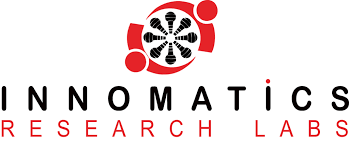

In [1]:
#source-Google images
from IPython.display import Image
Image(filename=r'innomatics.png')

# Looking into the Dataset

In [2]:
#Importing Pandas library  for data manipulation and analysis
import pandas as pd
#Importing Numpy library  for adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions,etc.
import numpy as np

In [3]:
#Reading train file and test file into pandas (train=df)
df=pd.read_csv('train.csv')

In [4]:
#Finding the shape of test file
df.shape

(1278, 3)

In [5]:
#Looking into the top 5 rows of train file
df.head()

col1        col2  output
0 -38.366669  113.000000       1
1 -39.818572  123.943369       1
2 -55.638240  114.551862       1
3 -36.378005   95.616515       1
4 -39.366669  112.000000       1

describe() method can show different values like count, mean, standard deviation, etc. of numeric data types.

In [6]:
df.describe()

col1         col2       output
count  1278.000000  1278.000000  1278.000000
mean     -2.407947     6.656915     0.602504
std      68.412871    67.506875     0.489572
min    -134.412463  -116.651027     0.000000
25%     -45.968703   -44.272914     0.000000
50%      -4.168508     7.249885     1.000000
75%      37.690801    50.458071     1.000000
max     134.499614   134.499262     1.000000

# Visualizing the Dataset

In [7]:
from pandas_profiling import ProfileReport

In [8]:
train_report=ProfileReport(df)

In [9]:
train_report

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
df.columns

Index(['col1', 'col2', 'output'], dtype='object')

In [11]:
X = df.drop('output',axis = 1)#X=data

In [12]:
y= df['output']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [15]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1022, 2) (1022,)
(256, 2) (256,)


# Checking the Logistic model

In [16]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression

In [17]:
#Training the model
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [18]:
# Loading the model from RAM to hard disk
from pickle import dump
dump(classifier, open('pickle/logistic_model.pkl', 'wb'))

In [19]:
# Prediction
y_test_predict1=classifier.predict(x_test)

In [20]:
# Checking the metrics
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_predict1))

0.61328125


# Checking the SVM classification

In [21]:
# Importing Classifier Modules
from sklearn.svm import SVC

In [22]:
#Training the model
clf = SVC(kernel='linear')  
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [23]:
# Loading the model from RAM to hard disk
dump(clf, open('pickle/svm_linear_model.pkl', 'wb'))

In [24]:
# Prediction
y_test_predict2=clf.predict(x_test)

In [25]:
# Checking the metrics
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_predict2))

0.61328125


# Checking the SVM Classification with 'RBF' kernel

In [26]:
#Training the model
clf1 = SVC(kernel='rbf')  
clf1.fit(x_train,y_train)

SVC()

In [27]:
# Loading the model from RAM to hard disk
dump(clf1, open('pickle/svm_rbf_model.pkl', 'wb'))

In [28]:
# Prediction
y_test_predict3=clf1.predict(x_test)

In [29]:
# Checking the metrics
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_predict3))

1.0


# Verifying the model

In [32]:
col_1=input('col 1')
col_2=input('col 2')
arr = np.array([col_1,col_2]).reshape(1,-1)
arr = arr.astype('float64') 

col 1-38.366669
col 2113.00000


In [33]:
arr1=arr
print(arr1)

[[-38.366669 113.      ]]


In [35]:
clf1.predict(arr1)

array([1], dtype=int64)

# Conclusion

<h5>After training a Machine Learning model using:</h5><br>
Logistic Regression Algorithm<br>
SVM with Linear Kernel<br>
SVM with RBF Kernel<br>
I got a greater accuracy with the SVM(Support Vector Machine), by taking the 'RBF(Radial Basis Function)' and hence I finally deployed my model by taking into consideration the SVM-RBF.